# Importing the Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import numpy as np
import os

# LOADING THE DATA

In [2]:
irisdata=pd.read_csv('Iris  Dataset.csv')
irisdata.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


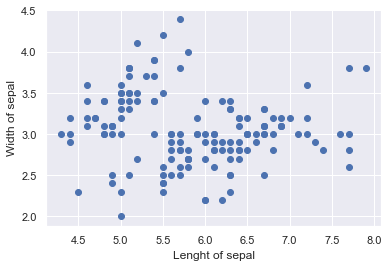

In [3]:
# Creating a scatter plot based on two corresponding features sepal_length and sepal_width
plt.scatter(irisdata['SepalLengthCm'],irisdata['SepalWidthCm'])

plt.xlabel('Lenght of sepal')
plt.ylabel('Width of sepal')
plt.show()

In [4]:
irisdata.drop(['Id'],inplace=True,axis=1)
irisdata

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
X=irisdata.iloc[:,:-1]
y=irisdata.iloc[:,-1]

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y1=le.fit_transform(y)

In [7]:
irisdata.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Splitting the dataset into the Training set and Test set

In [8]:
x1= irisdata.copy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size = 0.25, random_state = 0)

# Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



# Training the Decision Tree Classification model on the Training set

In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# Predicting the Test set results

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9736842105263158

# Visualizing the Decision Tree 

In [13]:
from sklearn import tree
os.environ["PATH"]+= os.pathsep+(r'C:\Users\Rishab\Desktop\IRIS FLOWER CLASSIFICATI(Rishabh)\release\bin')
import graphviz

vis_data=tree.export_graphviz(classifier,out_file=None, feature_names=irisdata.drop(['Species'],axis=1).keys(),class_names=irisdata['Species'].unique(),filled=True,rounded=True,special_characters=True)

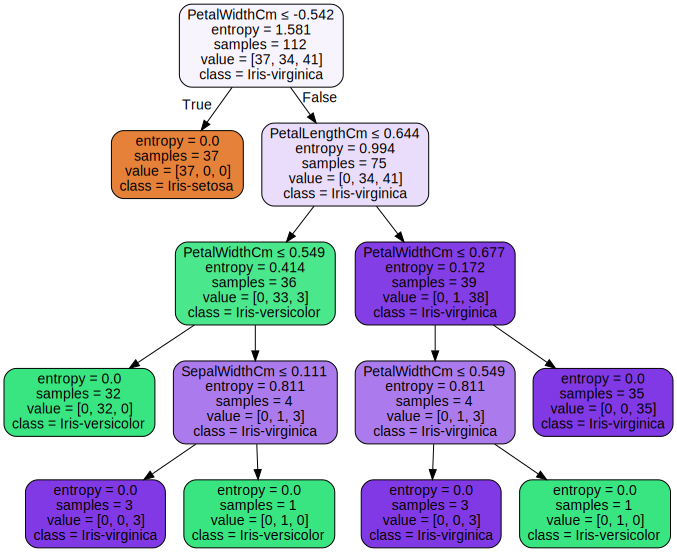

In [14]:
graphviz.Source(vis_data)